# Bug
## Description
Our library currently pads the scan (3D Image) to make it a cube. This should also add the appropriate pixels to the points. After this, the function scales the image and points down. Unfortunetly, this causes the points to be in a different visual space than expected.

In [1]:
import matplotlib.pyplot as plt
import nibabel as nib
import numpy as np

In [2]:
from ThreeDLabeler.images import Image
from ThreeDLabeler.PreProcessing import tag_parser
from ThreeDLabeler.plotting import mri_point_plot

In [3]:
img475 = nib.load("MouseSkullData/475.mnc")
tag475 = tag_parser("MouseSkullData/475_landmarks.tag")

In [4]:
data475 = img475.get_data()
vox_size_475 = img475.header.get_zooms()
tag475_scaled = tag475 / vox_size_475

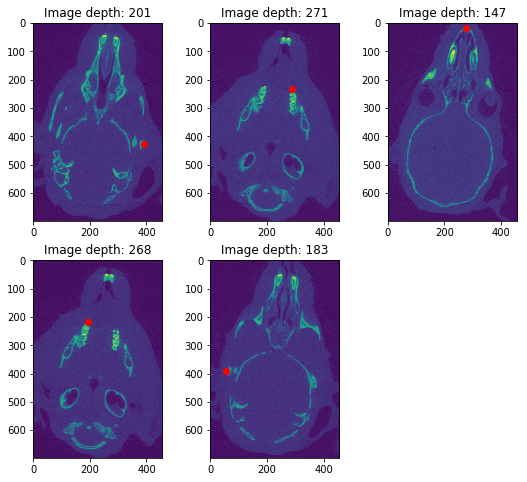

In [5]:
mri_point_plot(img=data475, df=tag475_scaled)

This is the original/official location of the key points

In [6]:
data475_scale = Image(voxels=data475, voxel_size=vox_size_475, point_positon=tag475)

In [8]:
data475_scale.cube()


In [13]:
print(data475_scale.point_positon)
print(data475_scale.voxels.shape)

            x           y           z
0  390.073885  352.407596  547.929610
1  287.661552  422.250371  352.533950
2  278.060859  298.583512  137.314690
3  194.903387  419.331555  340.204848
4   55.136381  334.661229  511.753664
(698, 698, 698)


In [10]:
type(data475_scale)

ThreeDLabeler.images.Image

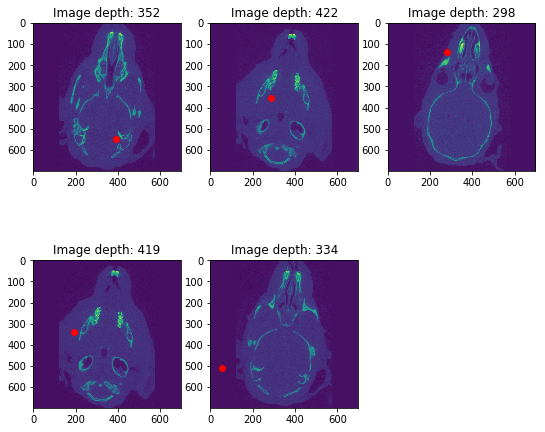

In [15]:
mri_point_plot(img=data475_scale.voxels, df=data475_scale.point_positon)

We can see here that the `cube` function is the issue but to double check the scale function we will do the same analysis.

In [16]:
data475_scale.scale(128) 

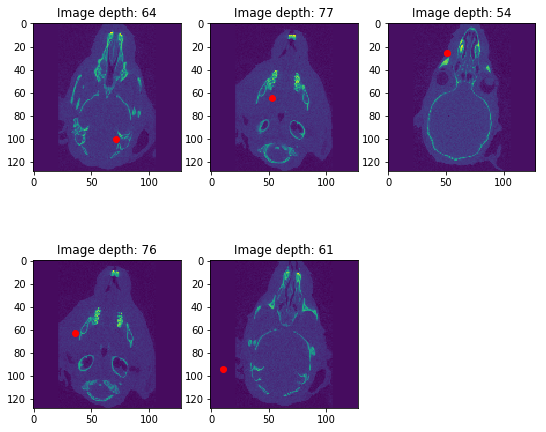

In [17]:
mri_point_plot(img=data475_scale.voxels, df=data475_scale.point_positon)

So the issue is obviously the scalling cubing. Must fix the issue